<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Conduct a public health study
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 1 - Importing libraries and loading files</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importing libraries</h3>
</div>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Loading files Excel</h3>
</div>

In [90]:
pop = pd.read_csv('population.csv')
da = pd.read_csv('dispo_alimentaire.csv')
aa = pd.read_csv('aide_alimentaire.csv')
sn = pd.read_csv('sous_nutrition.csv')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 2 - Exploratory file analysis</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Exploratory analysis of the population file</h3>
</div>

In [91]:
#Display dataset dimensions
print("The table contains {} comment(s) or item(s)".format(pop.shape[0]))
print("The table has {} column(s)".format(pop.shape[1]))

The table contains 1416 comment(s) or item(s)
The table has 3 column(s)


In [92]:
#View number of columns
#The type of data in each column
#Number of values in each column

#Consult the number of columns
print(f"The number of columns is {pop.shape[1]}")
#The type of data in each column
print(f"The nature of the data for column {pop.columns[0]} is {pop.dtypes[0]}")
print(f"The nature of the data for column {pop.columns[1]} is {pop.dtypes[1]}")
print(f"The nature of the data for column {pop.columns[2]} is {pop.dtypes[2]}")
#The number of values in each column

The number of columns is 3
The nature of the data for column Zone is object
The nature of the data for column Année is int64
The nature of the data for column Valeur is float64


In [93]:
#Display the first 5 rows of the table
pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [94]:
#Units harmonization by multiplying the population by 1000
#Multiply value column by 1000
pop["Valeur"] *=1000

In [95]:
#change column name from "Valeur" to "Population"
pop.rename(columns={"Valeur":"Population"},inplace = True)

In [96]:
#Display the first 5 rows of the table to see changes
pop.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Exploratory analysis of the food availability file</h3>
</div>

In [97]:
#Display dataset dimensions
print(f"The table contains {da.shape[0]} observation(s) or item(s)")
print(f"The array contains {da.shape[1]} column(s)")

The table contains 15605 observation(s) or item(s)
The array contains 18 column(s)


In [98]:
#Check number of columns
print(f"The array contains {da.shape[1]} column(s)")

The array contains 18 column(s)


In [99]:
#Display the first 5 rows of the table
da.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [100]:
#replace NaNs in the dataset with 0
da=da.replace(np.nan,0)

In [101]:
#multiplication of all lines containing thousands of tons in Kg
da['Aliments pour animaux'] = da['Aliments pour animaux']*1000
da['Autres Utilisations'] = da['Autres Utilisations']*1000
#da['Disponibilité alimentaire en quantité (kg/personne/an)'] = da['Disponibilité alimentaire en quantité (kg/personne/an)']*1000
#da['Disponibilité intérieure'] = da['Disponibilité intérieure']*1000
da['Exportations - Quantité'] = da['Exportations - Quantité']*1000
da['Importations - Quantité'] = da['Importations - Quantité']*1000
da['Nourriture'] = da['Nourriture']*1000
da['Pertes'] = da['Pertes']*1000
da['Production'] = da['Production']*1000
da['Semences'] = da['Semences']*1000
da['Traitement'] = da['Traitement']*1000
da['Variation de stock'] = da['Variation de stock']*1000

In [102]:
#Display the first 5 rows of the table
da.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Exploratory analysis of the food aid file</h3>
</div>

In [103]:
#Display dataset dimensions
print(f"The table contains {aa.shape[0]} observation(s) or item(s)")
print(f"The array contains {aa.shape[1]} column(s)")

The table contains 1475 observation(s) or item(s)
The array contains 4 column(s)


In [104]:
#Check number of columns
print(f"The table contains {aa.shape[1]} column(s)")

The table contains 4 column(s)


In [105]:
#Display the first 5 rows of the table
aa.head

<bound method NDFrame.head of      Pays bénéficiaire  Année                   Produit  Valeur
0          Afghanistan   2013       Autres non-céréales     682
1          Afghanistan   2014       Autres non-céréales     335
2          Afghanistan   2013              Blé et Farin   39224
3          Afghanistan   2014              Blé et Farin   15160
4          Afghanistan   2013                  Céréales   40504
...                ...    ...                       ...     ...
1470          Zimbabwe   2015  Mélanges et préparations      96
1471          Zimbabwe   2013              Non-céréales    5022
1472          Zimbabwe   2014              Non-céréales    2310
1473          Zimbabwe   2015              Non-céréales     306
1474          Zimbabwe   2013                Riz, total      64

[1475 rows x 4 columns]>

In [106]:
#change the name of the Beneficiary Country column to Zone
aa.rename(columns={'Pays bénéficiaire': 'Zone'},inplace=True)


In [107]:
#Multiply the Aide_alimentaire column containing tons by 1000 to obtain kg.
aa["Valeur"] *=1000

In [108]:
#Display the first 5 rows of the table
aa.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Exploratory analysis of the nutrition file</h3>
</div>

In [109]:
#Display dataset dimensions
print(f"The table contains {sn.shape[0]} observation(s) or item(s)")
print(f"The array contains {sn.shape[1]} column(s)")

The table contains 1218 observation(s) or item(s)
The array contains 3 column(s)


In [110]:
#Check number of columns
print(f"The table contains {sn.shape[1]} column(s)")

The table contains 3 column(s)


In [111]:
#Display the first 5 rows of the table
sn.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [112]:
#Convert Valeur column to digital
sn["Valeur"] = pd.to_numeric(sn["Valeur"], errors='coerce')

In [113]:
#Convert column (with errors=coerce argument to automatically convert non-number rows to NaN)
#Then replace NaN with 0
sn=sn.replace(np.nan,0)

In [114]:
#change Valeur column name to sous_nutrition
sn.rename(columns={'Valeur' : 'sous_nutrition'},inplace=True)

In [115]:
#Multiply the sous_nutrition column by 1000000
sn["sous_nutrition"] *= 1000000

In [116]:
#Display the first 5 rows of the table
sn.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion of undernourished people</h3>
</div>

In [117]:
# First, we need to make a join between the population table and the sub-nutrition table, targeting the year 2017.
sn.replace('2012-2014','2013',inplace=True)
sn.replace('2013-2015','2014',inplace=True)
sn.replace('2014-2016','2015',inplace=True)
sn.replace('2015-2017','2016',inplace=True)
sn.replace('2016-2018','2017',inplace=True)
sn.replace('2017-2019','2018',inplace=True)
sn=sn.replace(np.nan,0)
sn = sn[sn["Année"]=="2017"]

#2017 population
pop = pop[pop["Année"]==2017]

#joining the two df
pop_sn = pd.merge(pop,sn, on="Zone")

#cleaning
pop_sn.rename(columns = {"Année_y" : "Année"},inplace=True)
pop_sn.drop(["Année_x"], axis=1,inplace = True)



In [118]:
#Dataset display
pop_sn.head()

,Zone,Population,Année,sous_nutrition
0,Afghanistan,36296113.0,2017,10500000.0
1,Afrique du Sud,57009756.0,2017,3100000.0
2,Albanie,2884169.0,2017,100000.0
3,Algérie,41389189.0,2017,1300000.0
4,Allemagne,82658409.0,2017,0.0



In 2017, the number of inhabitants was 7.54 billion
The number of undernourished people was 536 million
The rate of undernutrition in the world was 7.1 %


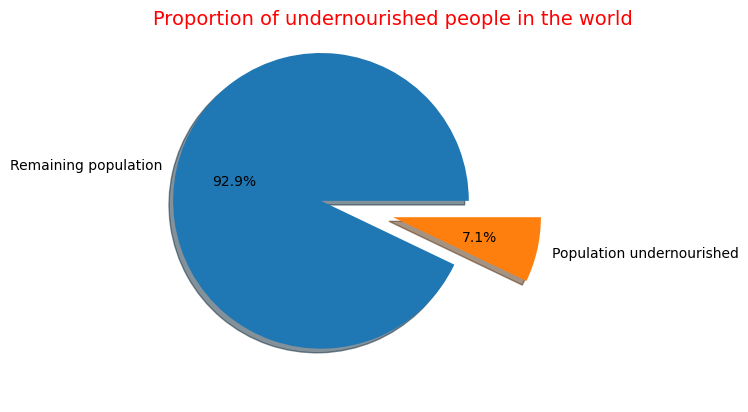

In [119]:
#Calculating and displaying the number of undernourished people
pop_monde=pop_sn["Population"].sum()
sn2017=pop_sn["sous_nutrition"].sum()
taux_sn = round((sn2017*100)/(pop_monde),2)
print()
print(f"In 2017, the number of inhabitants was {round(pop_monde/1000000000,2)} billion")
print(f"The number of undernourished people was {round(sn2017/1000000)} million")
print(f"The rate of undernutrition in the world was {taux_sn} %")

#Graph showing the rate of undernourishment in the world
personnes = pop_monde-sn2017, sn2017
labels = "Remaining population","Population undernourished"
explode = (0.5, 0)
plt.pie(x=personnes,explode=explode,labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of undernourished people in the world", fontsize=14, color="red")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Theoretical number of people who could be fed</h3>
</div>

In [120]:
#How much does the average human being eat? Source => 
print("The average human eats 2250 kcals a day")
print("Sources : https://www.ined.fr/fr/tout-savoir-population/memos-demo/faq/plus-hommes-ou-femmes-sur-terre/#:~:text=Plus%20pr%C3%A9cis%C3%A9ment%20encore%2C%20sur%201000,aussi%20%C3%A0%20l'%C3%A2ge%20adulte.")
print("Sources : https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte.html#:~:text=Pour%20un%20homme%20adulte%2C%20l,800%20%C3%A0%202%20200%20calories.")

The average human eats 2250 kcals a day
Sources : https://www.ined.fr/fr/tout-savoir-population/memos-demo/faq/plus-hommes-ou-femmes-sur-terre/#:~:text=Plus%20pr%C3%A9cis%C3%A9ment%20encore%2C%20sur%201000,aussi%20%C3%A0%20l'%C3%A2ge%20adulte.
Sources : https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte.html#:~:text=Pour%20un%20homme%20adulte%2C%20l,800%20%C3%A0%202%20200%20calories.


In [121]:
#We start by making a join between the population data frame and Dispo_alimentaire to add the population to the latter.
pop_da = pd.merge(pop,da)

In [122]:
#New dataframe displayed
pop_da

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37.0,0.0,6000.0,37000.0,0.0,32000.0,0.0,0.0,0.0
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70.0,0.0,6000.0,70000.0,0.0,64000.0,0.0,0.0,0.0
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000.0,7.0,2.29,0.21,1.12,34.0,3000.0,1000.0,32000.0,0.0,36000.0,0.0,0.0,0.0
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4.0,0.0,2000.0,4000.0,0.0,2000.0,0.0,0.0,0.0


In [123]:
#Creation of the dispo_kcal column with calculation of globally available kcal
pop_da["dispo_kcal"] = pop_da["Disponibilité alimentaire (Kcal/personne/jour)"]*pop_da["Population"]

In [124]:
#Calculating the number of humans that can be fed
nb_humain_nourris = ((pop_da["dispo_kcal"].sum())/2250)/1000000000
print(f"The number of humans that can be fed is {round(nb_humain_nourris,2)} billion")
print(f"So, {round(((nb_humain_nourris*100)*1000000000)/pop_monde,2)} % of world population")



The number of humans that can be fed is 9.3 billion
So, 123.24 % of world population


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Theoretical number of people who could be fed with plant products</h3>
</div>

In [125]:
#Transfer data with plants to a new dataframe
da_vege=pop_da[pop_da["Origine"]=="vegetale"]
da_vege

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
6,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Zimbabwe,2017,14236595.0,Sésame,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15407,Zimbabwe,2017,14236595.0,Thé,vegetale,0.0,0.0,1.0,0.54,0.00,...,8.0,12000.0,1000.0,8000.0,0.0,19000.0,0.0,0.0,0.0,14236595.0
15408,Zimbabwe,2017,14236595.0,Tomates,vegetale,0.0,0.0,1.0,1.80,0.01,...,27.0,0.0,3000.0,25000.0,1000.0,24000.0,0.0,0.0,0.0,14236595.0
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,4.0,0.0,2000.0,4000.0,0.0,2000.0,0.0,0.0,0.0,14236595.0


In [126]:
#Calculating the number of kcal available for plants
da_vege_totale = da_vege["dispo_kcal"].sum()

The number of people on Earth in 2017 is 7.54 billion
Plant availability is 17260.76 billion kcals
With plants alone, we could feed 7.67 billion people
That's 101.69 % of the population.


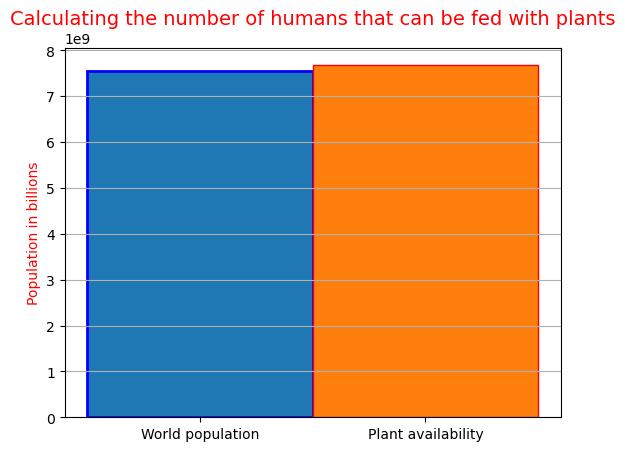

In [127]:
#Calculating the number of humans that can be fed with plants
round((da_vege_totale/2250)/1000000000,2)

print(f"The number of people on Earth in 2017 is {round(pop_monde/1000000000,2)} billion")
print(f"Plant availability is {round(da_vege_totale/1000000000,2)} billion kcals")
print(f"With plants alone, we could feed {round((da_vege_totale/2250)/1000000000,2)} billion people")
print(f"That's {round(da_vege_totale/2250*100/pop_monde,2)} % of the population.") 

plt.bar(height=pop_monde, x="World population",linewidth = 2, width =1, edgecolor = 'blue')
plt.bar(height=(da_vege_totale/2250), x="Plant availability", edgecolor = 'red',width =1)

plt.title("Calculating the number of humans that can be fed with plants", fontsize=14, color="red")
plt.ylabel("Population in billions", color="red")
plt.grid(axis="y")

plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Use of domestic availability</h3>
</div>

In [128]:
#Total availability calculation
dispo_totale = pop_da["Disponibilité intérieure"].sum()
print(f"Domestic availability = {dispo_totale} kcals")
dispo_totale2 = (da["Production"]+da["Importations - Quantité"]-da["Exportations - Quantité"]+da["Variation de stock"]).sum()
print(f"Domestic availability 2 ={dispo_totale2} kcals")
dispo_totale3 = (da["Semences"]+da["Pertes"]+da["Nourriture"]+da["Aliments pour animaux"]+da["Traitement"]+da["Autres Utilisations"]).sum()
print(f"Domestic availability 3 = {dispo_totale3} kcals")
dispo_interieure=round((dispo_totale*1000+dispo_totale2+dispo_totale3)/3)
print(f"The domestic availability is {dispo_interieure} kcals")


Domestic availability = 9733927.0 kcals
Domestic availability 2 =9849173000.0 kcals
Domestic availability 3 = 9858592000.0 kcals
The domestic availability is 9813897333 kcals


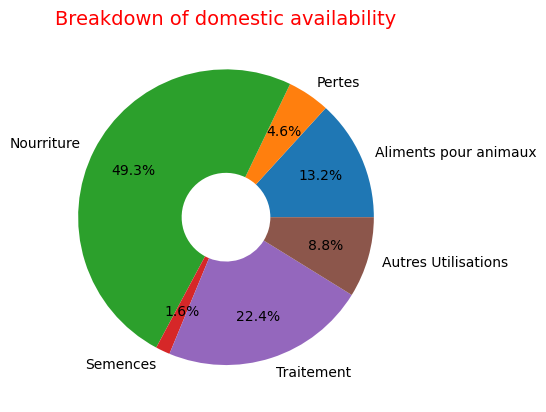

In [129]:
colonnes_a_afficher = ["Aliments pour animaux", "Pertes", "Nourriture", "Semences", "Traitement", "Autres Utilisations"]
data = pop_da[colonnes_a_afficher].sum()
    
plt.pie(x=data, labels=colonnes_a_afficher, wedgeprops=dict(width=0.7) ,autopct='%1.1f%%',pctdistance=.7,rotatelabels=False)
plt.title("Breakdown of domestic availability", fontsize=14, color="red")

plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Use of cereals</h3>
</div>

In [130]:
#Create a list with all variables
liste_cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle","Avoine", "Millet", "Sorgho", "Céréales, Autres"]


In [131]:
#Create a dataframe with information for these cereals only

da_vege_cereales = da_vege[da_vege["Produit"].isin(liste_cereales)]
da_vege_cereales.head()


,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
7,Afghanistan,2017,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,...,5992.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0,4.968938e+10
12,Afghanistan,2017,36296113.0,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
32,Afghanistan,2017,36296113.0,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,...,313.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0,7.622184e+08
34,Afghanistan,2017,36296113.0,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,...,13.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0,1.088883e+08
40,Afghanistan,2017,36296113.0,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,...,524.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0,9.436989e+08


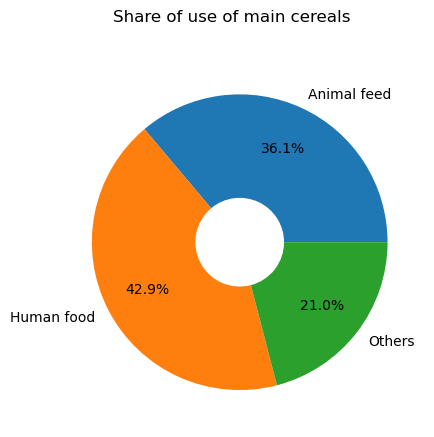

In [132]:
taux_aliment_animaux = ((da_vege_cereales['Aliments pour animaux'].sum())*100)/ (da_vege_cereales['Disponibilité intérieure']*1000).sum()
taux_aliment_humains = ((da_vege_cereales['Nourriture'].sum())*100)/ (da_vege_cereales['Disponibilité intérieure']*1000).sum()
autres = 100-taux_aliment_animaux-taux_aliment_humains
data = taux_aliment_animaux, taux_aliment_humains, autres
labels = "Animal feed", "Human food", "Others"

plt.pie(x=data, labels = labels, wedgeprops=dict(width=0.7) ,autopct='%1.1f%%',pctdistance=.7)
plt.suptitle("Share of use of main cereals")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Countries with the highest proportion of undernourished people in 2017</h3>
</div>

In [133]:
#Create proportion by country column

pop_sn = pd.merge(pop, sn, on="Zone")
pop_sn.drop(["Année_x"], axis=1,inplace = True)
pop_sn.rename(columns = {"Année_y":"Année"}, inplace = True)
pop_sn["Proportion"] = round((pop_sn["sous_nutrition"]*100)/pop_sn["Population"],2)


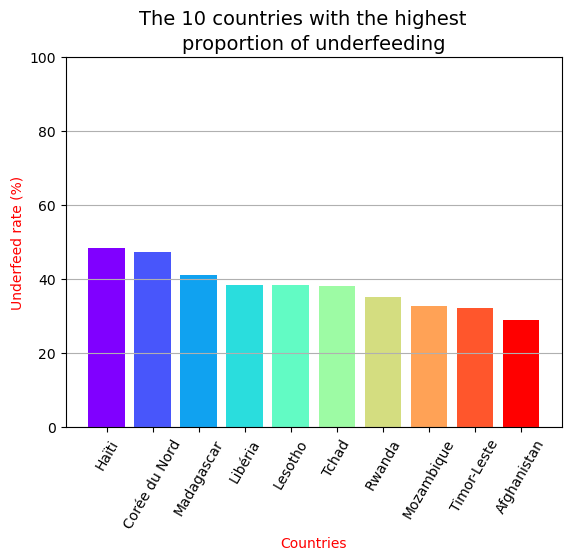

In [134]:
#Display after sorting the 10 worst countries



pop_sn.sort_values(by = "Proportion", ascending = False, inplace = True)
pop_sn.replace("République populaire démocratique de Corée","Corée du Nord", inplace=True)

data3 = pop_sn.head(10)

plt.bar(height=data3["Proportion"], x=data3["Zone"],color = cm.rainbow(np.linspace(0, 1, len(data3))) )
plt.suptitle("The 10 countries with the highest ", fontsize=14, color="black")
plt.title("proportion of underfeeding", fontsize=14, color="black")
plt.xticks(rotation =60)
plt.xlabel("Countries", color="red")
plt.ylabel("Underfeed rate (%)", color="red")
plt.grid(axis="y")
plt.ylim(0,100)


plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Countries that have received the most food aid since 2013</h3>
</div>

In [135]:
aa.rename(columns = {"Valeur":"Aide alimentaire en tonnes"}, inplace = True)

#total food aid by country
aide = aa[['Zone','Aide alimentaire en tonnes']].groupby("Zone").sum()



In [136]:
#Display after sorting the 10 countries that benefited most from food aid
aide.sort_values(by="Aide alimentaire en tonnes", ascending=False).head(10)

,Aide alimentaire en tonnes
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution of the 5 countries that benefited most from food aid between 2013 and 2016</h3>
</div>

In [137]:
#Create a dataframe with zone, year and food aid, then groupby on zone and year. 
aa.drop(["Produit"], axis=1, inplace= True)
aa = aa.groupby(["Zone", "Année"]).sum("Aide alimentaire en tonnes")


In [138]:
#Create a list of the 5 countries that have benefited most from food aid
aa_top5 = aa.groupby("Zone").sum("Aide alimentaire en tonnes")
aa_top5.sort_values(by = "Aide alimentaire en tonnes", ascending = False, inplace = True)
aa_top5 = aa_top5.head(5)
aa_top5.reset_index(level=None, inplace=True)
aa.reset_index(inplace=True)

In [139]:
#We filter the dataframe with our list
liste_aa_top5 = aa_top5["Zone"].tolist() 
aa=aa[aa.Zone.isin(liste_aa_top5)]


In [140]:
# Display of countries with food aid by year
print("Here is the list of countries with their food aid per year (in millions of tons)")
aa = aa.groupby(["Zone", "Année"]).sum("Aide alimentaire en tonnes")
aa["Aide alimentaire en tonnes"]=round(aa["Aide alimentaire en tonnes"],2)
aa

Here is the list of countries with their food aid per year (in millions of tons)


Aide alimentaire en tonnes
Zone                      Année                            
République arabe syrienne 2013                    563566000
                          2014                    651870000
                          2015                    524949000
                          2016                    118558000
Soudan                    2013                    330230000
                          2014                    321904000
                          2015                     17650000
Soudan du Sud             2013                    196330000
                          2014                    450610000
                          2015                     48308000
Yémen                     2013                    264764000
                          2014                    103840000
                          2015                    372306000
                          2016                    465574000
Éthiopie                  2013                    591404000
                          2014                    586624000
                          2015                    203266000

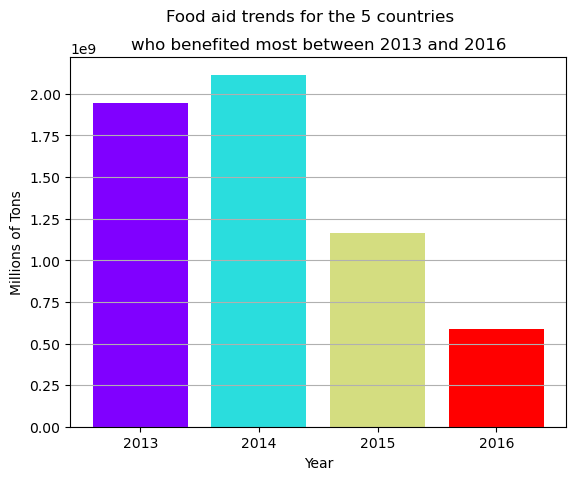

In [141]:

evolution_aa = aa.groupby("Année").sum("Aide alimentaire en tonnes")
plt.bar(("2013","2014","2015","2016"), evolution_aa["Aide alimentaire en tonnes"], color = cm.rainbow(np.linspace(0, 1, len(evolution_aa))))

plt.suptitle("Food aid trends for the 5 countries")
plt.title("who benefited most between 2013 and 2016")
plt.grid(axis="y")
plt.xlabel('Year')
plt.ylabel('Millions of Tons')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Countries with the lowest availability per capita</h3>
</div>

In [142]:
#Calculating availability in kcal per person per day per country
da_par_zone = da.groupby("Zone").sum("Disponibilité alimentaire (Kcal/personne/jour")
da_par_zone.head()



,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0
Afrique du Sud,5309000.0,876000.0,3020.0,564.80,83.58,85.33,61256.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0
Albanie,660000.0,174000.0,3188.0,1095.54,106.48,111.37,4758.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0
Algérie,4352000.0,1707000.0,3293.0,809.13,76.48,91.92,42630.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0
Allemagne,30209000.0,7711000.0,3503.0,957.52,141.62,101.39,162275.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0


/var/folders/ys/x9zrppb9483b7ncwjcb1t25m0000gn/T/ipykernel_80289/434188866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_par_zone_low10.replace('République populaire démocratique de Corée','Corée du Nord',inplace=True)


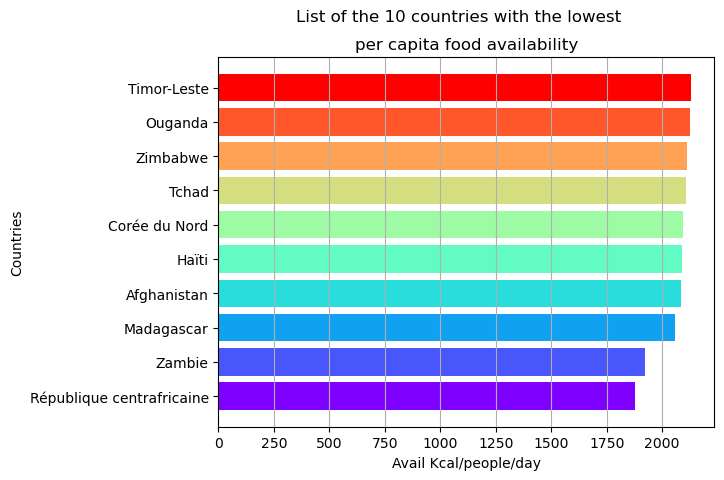

In [143]:
#Display of the 10 countries with the lowest food availability per capita 
da_par_zone.sort_values(by = "Disponibilité alimentaire (Kcal/personne/jour)", ascending = True, inplace = True)


da_par_zone_low10 = da_par_zone.head(10)
da_par_zone_low10.reset_index(inplace=True)
da_par_zone_low10.replace('République populaire démocratique de Corée','Corée du Nord',inplace=True)


plt.barh(y = da_par_zone_low10["Zone"], width = da_par_zone_low10["Disponibilité alimentaire (Kcal/personne/jour)"], color = cm.rainbow(np.linspace(0, 1, len(da_par_zone_low10))))

plt.suptitle("List of the 10 countries with the lowest")
plt.title("per capita food availability")
plt.grid(axis="x")
plt.xlabel('Avail Kcal/people/day')
plt.ylabel('Countries')
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Countries with the highest availability per capita</h3>
</div>

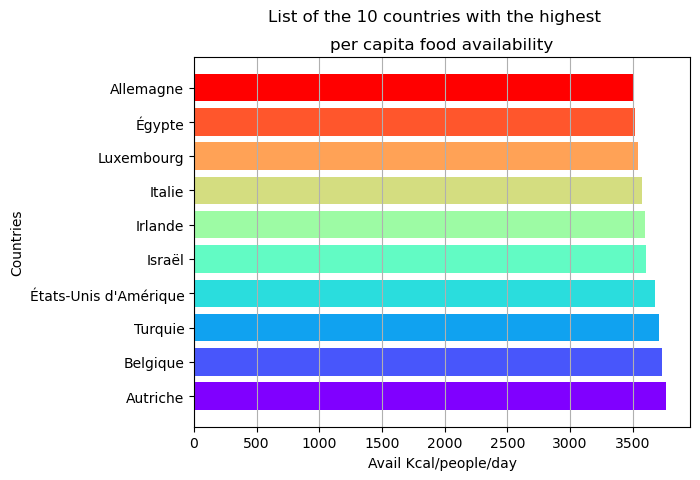

In [144]:
#Display of the 10 countries with the most food available per person 


da_par_zone = da_par_zone.loc[:,["Disponibilité alimentaire (Kcal/personne/jour)"]]
da_par_zone.sort_values(by = "Disponibilité alimentaire (Kcal/personne/jour)", ascending = False, inplace = True)
da_par_zone_top10 = da_par_zone.head(10)
da_par_zone_top10.head(10)
da_par_zone_top10.reset_index(inplace=True)

plt.barh(y = da_par_zone_top10["Zone"], width = da_par_zone_top10["Disponibilité alimentaire (Kcal/personne/jour)"], color = cm.rainbow(np.linspace(0, 1, len(da_par_zone_low10))))

plt.suptitle("List of the 10 countries with the highest")
plt.title("per capita food availability")
plt.grid(axis="x")
plt.xlabel('Avail Kcal/people/day')
plt.ylabel('Countries')
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Example of Thailand for cassava</h3>
</div>

In [145]:
#creation of a dataframe with Thailand only 
da_thailande = da[da["Zone"]=="Thaïlande"]
sn_thailande = sn[sn["Zone"]=="Thaïlande"]
pop_thailande = pop[pop["Zone"]=="Thaïlande"]
pop_thailande["Année"] = pd.to_numeric(pop_thailande["Année"], errors='coerce')
sn_thailande["Année"] = pd.to_numeric(sn_thailande["Année"], errors='coerce')
thailande = pd.merge(pop_thailande, sn_thailande,on="Année")
thailande.drop(["Zone_y"],axis=1,inplace = True)
thailande.rename(columns = {"Zone_x" : "Pays"},inplace=True)

/var/folders/ys/x9zrppb9483b7ncwjcb1t25m0000gn/T/ipykernel_80289/4158926557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_thailande["Année"] = pd.to_numeric(pop_thailande["Année"], errors='coerce')
/var/folders/ys/x9zrppb9483b7ncwjcb1t25m0000gn/T/ipykernel_80289/4158926557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sn_thailande["Année"] = pd.to_numeric(sn_thailande["Année"], errors='coerce')


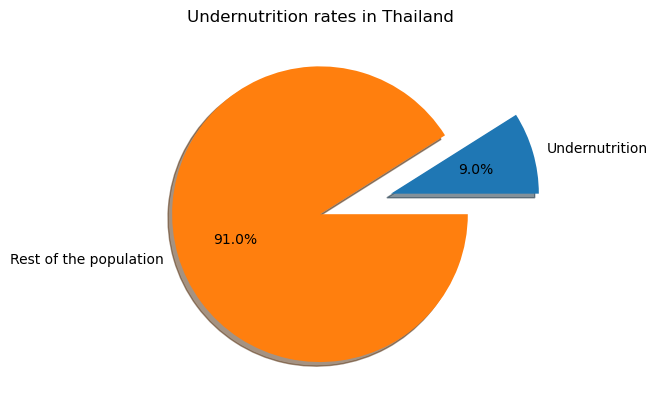

In [146]:
#Calculating undernutrition in Thailand


taux_sn_thai_pop = thailande["sous_nutrition"].sum(), (thailande["Population"].sum()-thailande["sous_nutrition"].sum())
labels_sn_thai_pop = "Undernutrition", "Rest of the population" 

plt.pie(x=taux_sn_thai_pop,explode=explode, labels=labels_sn_thai_pop, autopct='%1.1f%%', shadow=True)
plt.title("Undernutrition rates in Thailand")

plt.show()
